In [ ]:
from google.colab import files
uploaded = files.upload()

Saving perrin-freres-monthly-champagne.csv to perrin-freres-monthly-champagne.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['perrin-freres-monthly-champagne.csv']))

In [ ]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.rename(columns = {'Month':'Date', 'Perrin Freres monthly champagne sales millions ?64-?72' : 'Sales'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
df

,Date,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.set_index('Date', inplace = True)

In [ ]:
df

,Sales
Date,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


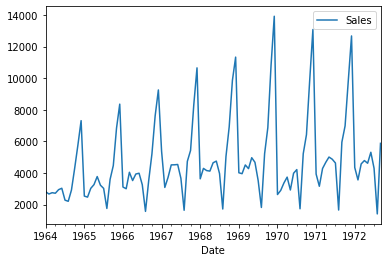

In [ ]:
df.plot()

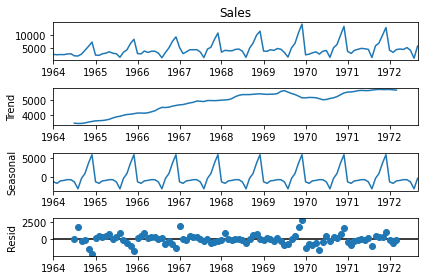

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dec_additive = seasonal_decompose(df['Sales'], model='additive')
s_dec_additive.plot()
plt.show()

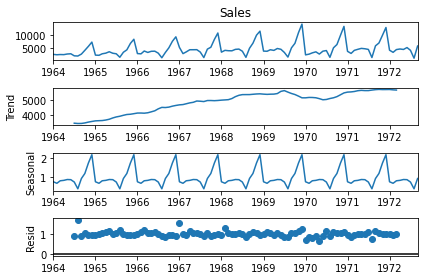

In [ ]:
s_dec_multip = seasonal_decompose(df['Sales'], model='multiplicative')
s_dec_multip.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
  result = adfuller(series)
  print('ADF statistics : {}'. format(result[0]))
  print('p-value : {}'.format(result[1]))
  if result[1] <= 0.05:
    print('reject null hypothesis and data is stationary')
  else:
    print('weak evidence of null hypothesis and data is not stationary')

In [ ]:
adf_test(df['Sales'])

ADF statistics : -1.8335930563276188
p-value : 0.363915771660247
weak evidence of null hypothesis and data is not stationary


In [ ]:
df['roll_mean'] = (df.Sales.rolling(window=24).mean())

In [ ]:
adf_test(df['roll_mean'].dropna())

ADF statistics : -2.2603475316728274
p-value : 0.1850756480718505
weak evidence of null hypothesis and data is not stationary


In [ ]:
df['roll_mean_first_diff'] = df['roll_mean'] - df['roll_mean'].shift(1)

In [ ]:
adf_test(df['roll_mean_first_diff'].dropna())

ADF statistics : -5.916804007763213
p-value : 2.561407157512279e-07
reject null hypothesis and data is stationary


In [ ]:
df['Sales_first_diff'] = df['Sales'] - df['Sales'].shift(1)

In [ ]:
adf_test(df['Sales_first_diff'].dropna())

ADF statistics : -7.189896448051
p-value : 2.519620447387081e-10
reject null hypothesis and data is stationary


In [ ]:
df['Logging_sales'] = np.log(df['Sales'])

In [ ]:
adf_test(df['Logging_sales'].dropna())

ADF statistics : -2.2551186012844227
p-value : 0.1868517311168746
weak evidence of null hypothesis and data is not stationary


In [ ]:
df['Logging_sales_first_diff'] = df['Logging_sales'] - df['Logging_sales'].shift(1)

In [ ]:
adf_test(df['Logging_sales_first_diff'].dropna())

ADF statistics : -4.460914465253656
p-value : 0.00023121404649533762
reject null hypothesis and data is stationary


In [ ]:
P_value =  [2.561407157512279e-07,0.00023121404649533762, 2.519620447387081e-10]

In [ ]:
print(min(P_value))

2.519620447387081e-10


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

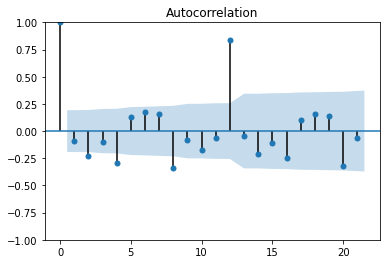

In [ ]:
acf = plot_acf(df['Sales_first_diff'].dropna())

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


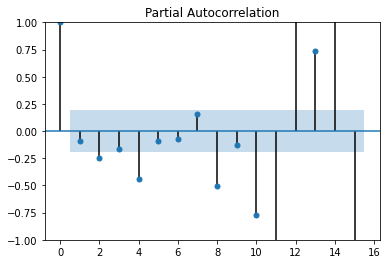

In [ ]:
pacf = plot_pacf(df['Sales_first_diff'].dropna(), lags = 15)

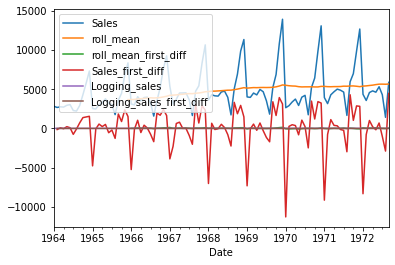

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
train_size = int(len(df)*0.90)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [ ]:
model_ARIMA = ARIMA(train_data['Sales'],order = (4,1,2))

NotImplementedError: ignored

In [ ]:
model_ARIMA_fit = model_ARIMA.fit()

In [ ]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   93
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -837.954
Method:                       css-mle   S.D. of innovations           1924.848
Date:                Wed, 10 Aug 2022   AIC                           1691.907
Time:                        06:20:08   BIC                           1712.168
Sample:                    02-01-1964   HQIC                          1700.088
                         - 10-01-1971                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            25.7729      8.300      3.105      0.003       9.506      42.040
ar.L1.D.Sales    -0.2191      0.125     -1.757      0.082      -0.464       0.025
ar.L2.D.Sales     0.1076      0.111      0.971      0.334      -0.110       0.325
ar.L3.D.Sales    -0.1725      0.104     -1.652      0.102      -0.377       0.032
ar.L4.D.Sales    -0.3187      0.100     -3.194      0.002      -0.514      -0.123
ma.L1.D.Sales    -0.2225      0.100     -2.227      0.029      -0.418      -0.027
ma.L2.D.Sales    -0.7775      0.097     -7.978      0.000      -0.969      -0.587
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1298           -0.7513j            1.3568           -0.4066
AR.2           -1.1298           +0.7513j            1.3568            0.4066
AR.3            0.8592           -0.9829j            1.3055           -0.1357
AR.4            0.8592           +0.9829j            1.3055            0.1357
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.2861           +0.0000j            1.2861            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [ ]:
pred_arima = model_ARIMA_fit.predict(start = pred_start_date, end = pred_end_date)

In [ ]:
pred_arima

1971-11-01    -344.466776
1971-12-01     555.386155
1972-01-01   -1663.009565
1972-02-01     196.646152
1972-03-01    -166.793227
1972-04-01     208.823658
1972-05-01     473.692045
1972-06-01     -73.925500
1972-07-01     125.637425
1972-08-01    -142.431592
1972-09-01     -52.179707
Freq: MS, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
MSE = mean_squared_error(test_data['Sales'],pred_arima, squared = False)
print(MSE)

6344.8030291272225


In [ ]:
r2 = r2_score(test_data['Sales'], pred_arima)
print(r2)

-3.621516827684652


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_SARIMA = SARIMAX(train_data['Sales'], order = (2,1,4), seasonal_order = (0,1,0,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_SARIMA_fit = model_SARIMA.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   94
Model:             SARIMAX(2, 1, 4)x(0, 1, [], 12)   Log Likelihood                -655.765
Date:                             Wed, 10 Aug 2022   AIC                           1325.531
Time:                                     07:03:08   BIC                           1342.292
Sample:                                 01-01-1964   HQIC                          1332.256
                                      - 10-01-1971                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2260      0.143     -1.584      0.113      -0.506       0.054
ar.L2         -0.8778      0.144     -6.075      0.000      -1.161      -0.595
ma.L1         -0.4736      0.174     -2.727      0.006      -0.814      -0.133
ma.L2          0.5830      0.276      2.114      0.035       0.042       1.124
ma.L3         -0.6598      0.221     -2.983      0.003      -1.093      -0.226
ma.L4         -0.2884      0.113     -2.555      0.011      -0.510      -0.067
sigma2      7.326e+05   1.67e+05      4.390      0.000    4.06e+05    1.06e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 5.14
Prob(Q):                              0.59   Prob(JB):                         0.08
Heteroskedasticity (H):               2.48   Skew:                            -0.18
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_SARIMA = model_SARIMA_fit.predict(start = pred_start_date, end = pred_end_date)

In [ ]:
pred_SARIMA

1971-11-01    10146.784704
1971-12-01    13571.906546
1972-01-01     4265.007017
1972-02-01     3276.338766
1972-03-01     4594.043089
1972-04-01     5130.463498
1972-05-01     5261.347533
1972-06-01     5042.716501
1972-07-01     4998.680343
1972-08-01     2052.707882
1972-09-01     6165.482261
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
RMSE = np.sqrt(mean_squared_error(test_data['Sales'],pred_SARIMA, squared = False))
print(RMSE)

22.0024057889657


In [ ]:
r2 = r2_score(test_data['Sales'], pred_SARIMA)
print(r2)

0.9730952518767355


In [ ]:
test_data['Pred_SARIMA'] = pred_SARIMA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_data

,Sales,roll_mean,roll_mean_first_diff,Sales_first_diff,Logging_sales,Logging_sales_first_diff,Pred_SARIMA
Date,,,,,,,
1971-11-01,9851.0,5375.500000,-39.666667,2870.0,9.195328,0.344381,10146.784704
1971-12-01,12670.0,5323.583333,-51.916667,2819.0,9.446992,0.251664,13571.906546
1972-01-01,4348.0,5394.791667,71.208333,-8322.0,8.377471,-1.069521,4265.007017
1972-02-01,3564.0,5422.500000,27.708333,-784.0,8.178639,-0.198832,3276.338766
1972-03-01,4577.0,5472.791667,50.291667,1013.0,8.428799,0.250160,4594.043089
1972-04-01,4788.0,5516.458333,43.666667,211.0,8.473868,0.045069,5130.463498
1972-05-01,4618.0,5586.916667,70.458333,-170.0,8.437717,-0.036151,5261.347533
1972-06-01,5312.0,5642.166667,55.250000,694.0,8.577724,0.140007,5042.716501
1972-07-01,4298.0,5645.541667,3.375000,-1014.0,8.365905,-0.211819,4998.680343


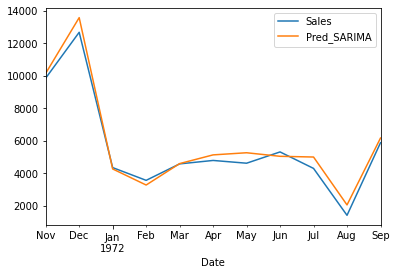

In [ ]:
test_data[['Sales','Pred_SARIMA']].plot()

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [ ]:
model_simple_exp1 = SimpleExpSmoothing(train_data['Sales'])
results_simple_exp1 = model_simple_exp1.fit()
results_simple_exp1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Dep. Variable:,Sales,No. Observations:,94
Model:,SimpleExpSmoothing,SSE,566587588.638
Optimized:,True,AIC,1471.514
Trend:,None,BIC,1476.600
Seasonal:,None,AICC,1471.963
Seasonal Periods:,None,Date:,"Wed, 10 Aug 2022"
Box-Cox:,False,Time:,06:37:01
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0777408,alpha,True
initial_level,3449.6606,l.0,True


In [ ]:
pred_expo_sim = results_simple_exp1.predict(start = pred_start_date, end = pred_end_date)

In [ ]:
pred_expo_sim

1971-11-01    5197.188922
1971-12-01    5197.188922
1972-01-01    5197.188922
1972-02-01    5197.188922
1972-03-01    5197.188922
1972-04-01    5197.188922
1972-05-01    5197.188922
1972-06-01    5197.188922
1972-07-01    5197.188922
1972-08-01    5197.188922
1972-09-01    5197.188922
Freq: MS, dtype: float64

In [ ]:
test_data['pred_expo_sim'] = pred_expo_sim

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
r2 = r2_score(test_data['Sales'], pred_expo_sim)
print(r2)

-0.016316033328024337


In [ ]:
model_damped_holt_mul_add = ExponentialSmoothing(train_data['Sales'],trend='mul',
                                             seasonal='add',damped_trend=True)
results_damped_holt_mul_add = model_damped_holt_mul_add.fit()
results_damped_holt_mul_add.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Dep. Variable:,Sales,No. Observations:,94
Model:,ExponentialSmoothing,SSE,48311306.044
Optimized:,True,AIC,1270.089
Trend:,Multiplicative,BIC,1313.325
Seasonal:,Additive,AICC,1280.359
Seasonal Periods:,12,Date:,"Wed, 10 Aug 2022"
Box-Cox:,False,Time:,06:52:01
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0001,beta,True


In [ ]:
pred_expo_mul_add = results_damped_holt_mul_add.predict(start = pred_start_date, end = pred_end_date)

In [ ]:
test_data['pred_expo_mul_add'] = pred_expo_mul_add

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
r2 = r2_score(test_data['Sales'], pred_expo_mul_add)
print(r2)

0.9330900043778038


In [ ]:
model_damped_holt_mul = ExponentialSmoothing(train_data['Sales'],trend='mul',
                                             seasonal='mul',damped_trend=True)
results_damped_holt_mul = model_damped_holt_mul.fit()
results_damped_holt_mul.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Dep. Variable:,Sales,No. Observations:,94
Model:,ExponentialSmoothing,SSE,35941811.226
Optimized:,True,AIC,1242.287
Trend:,Multiplicative,BIC,1285.523
Seasonal:,Multiplicative,AICC,1252.557
Seasonal Periods:,12,Date:,"Wed, 10 Aug 2022"
Box-Cox:,False,Time:,06:54:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0757143,alpha,True
smoothing_trend,0.0001,beta,True


In [ ]:
pred_expo_mul = results_damped_holt_mul.predict(start = pred_start_date, end = pred_end_date)

In [ ]:
test_data['pred_expo_mul'] = pred_expo_mul

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
r2 = r2_score(test_data['Sales'], pred_expo_mul)
print(r2)

0.949477083435698


In [ ]:
RMSE = np.sqrt(mean_squared_error(test_data['Sales'],pred_expo_mul, squared = False))
print(RMSE)

25.756392862488525


In [ ]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 86 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.2 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638560 sha256=a403e98acc4f406ff2fe86b0a94ee9a030b8dfd9020ed8e9ddb4d661282672f8
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.4
    Uninstalling cmdstanpy-1.0.4:
      Successfully uninstalled cmdstanpy-1.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires cmdstanpy>=1.0.1, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
from fbprophet import Prophet

In [ ]:
train_data.reset_index(inplace = True)

In [ ]:
ts = pd.DataFrame({'ds':train_data.Date,'y':train_data.Sales})
ts.head()

,ds,y
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
ts

,ds,y
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
89,1971-06-01,4874.0
90,1971-07-01,4633.0
91,1971-08-01,1659.0
92,1971-09-01,5951.0


In [ ]:
model_prophet = Prophet(seasonality_mode='multiplicative').fit(ts)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
test_data

,Sales,roll_mean,roll_mean_first_diff,Sales_first_diff,Logging_sales,Logging_sales_first_diff,Pred_SARIMA,pred_expo_sim,pred_expo_mul_add,pred_expo_mul
Date,,,,,,,,,,
1971-11-01,9851.0,5375.500000,-39.666667,2870.0,9.195328,0.344381,10146.784704,5197.188922,10797.102399,11058.437751
1971-12-01,12670.0,5323.583333,-51.916667,2819.0,9.446992,0.251664,13571.906546,5197.188922,13827.780499,14169.541436
1972-01-01,4348.0,5394.791667,71.208333,-8322.0,8.377471,-1.069521,4265.007017,5197.188922,4457.995281,4122.373810
1972-02-01,3564.0,5422.500000,27.708333,-784.0,8.178639,-0.198832,3276.338766,5197.188922,4017.047952,3723.018619
1972-03-01,4577.0,5472.791667,50.291667,1013.0,8.428799,0.250160,4594.043089,5197.188922,4939.171522,4622.888013
1972-04-01,4788.0,5516.458333,43.666667,211.0,8.473868,0.045069,5130.463498,5197.188922,5278.389536,4932.905667
1972-05-01,4618.0,5586.916667,70.458333,-170.0,8.437717,-0.036151,5261.347533,5197.188922,5390.078200,5045.254341
1972-06-01,5312.0,5642.166667,55.250000,694.0,8.577724,0.140007,5042.716501,5197.188922,5524.157365,5238.070098
1972-07-01,4298.0,5645.541667,3.375000,-1014.0,8.365905,-0.211819,4998.680343,5197.188922,5309.183789,4876.992835


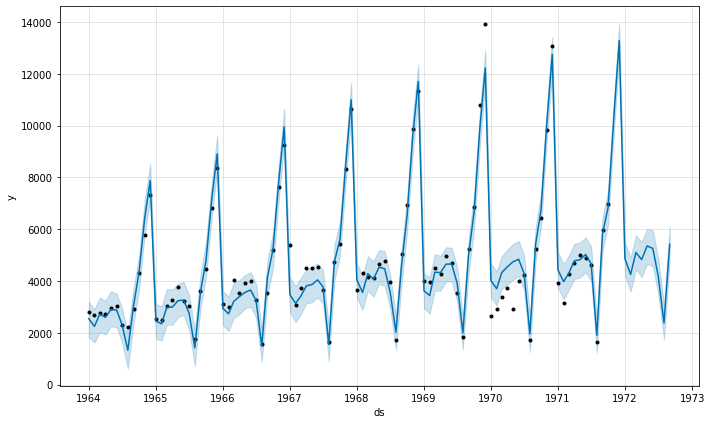

In [ ]:
future = model_prophet.make_future_dataframe(periods=11, freq='MS')
fcst = model_prophet.predict(future)
fig = model_prophet.plot(fcst)

In [ ]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1964-01-01,3198.859989,1833.367693,3201.904687,3198.859989,3198.859989,-0.204855,-0.204855,-0.204855,-0.204855,-0.204855,-0.204855,0.0,0.0,0.0,2543.558673
1,1964-02-01,3238.974560,1620.026054,2904.832834,3238.974560,3238.974560,-0.306899,-0.306899,-0.306899,-0.306899,-0.306899,-0.306899,0.0,0.0,0.0,2244.936815
2,1964-03-01,3276.501094,2021.590084,3361.093140,3276.501094,3276.501094,-0.170859,-0.170859,-0.170859,-0.170859,-0.170859,-0.170859,0.0,0.0,0.0,2716.680439
3,1964-04-01,3316.615665,1934.514876,3243.230253,3316.615665,3316.615665,-0.218087,-0.218087,-0.218087,-0.218087,-0.218087,-0.218087,0.0,0.0,0.0,2593.306389
4,1964-05-01,3355.436218,2238.093746,3606.063958,3355.436218,3355.436218,-0.135556,-0.135556,-0.135556,-0.135556,-0.135556,-0.135556,0.0,0.0,0.0,2900.586650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1972-05-01,6192.174606,4663.280389,6012.095996,6186.490192,6198.363299,-0.135556,-0.135556,-0.135556,-0.135556,-0.135556,-0.135556,0.0,0.0,0.0,5352.788082
101,1972-06-01,6211.821421,4556.430848,5959.995798,6204.802487,6219.179539,-0.153511,-0.153511,-0.153511,-0.153511,-0.153511,-0.153511,0.0,0.0,0.0,5258.240624
102,1972-07-01,6230.834468,3483.293677,4857.406726,6222.346751,6239.956594,-0.330253,-0.330253,-0.330253,-0.330253,-0.330253,-0.330253,0.0,0.0,0.0,4173.084253
103,1972-08-01,6250.481283,1749.556345,3085.791831,6240.470970,6261.539798,-0.619379,-0.619379,-0.619379,-0.619379,-0.619379,-0.619379,0.0,0.0,0.0,2379.067479


In [ ]:
print(pred_start_date)
print(pred_end_date)

1971-11-01 00:00:00
1972-09-01 00:00:00


In [ ]:
filtered_df = fcst.loc[(fcst['ds'] >= pred_start_date)
                     & (fcst['ds'] < '1972-10-01')]

In [ ]:
filtered_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
94,1971-11-01,6076.828789,9623.473086,10927.481262,6076.786484,6076.908348,0.687406,0.687406,0.687406,0.687406,0.687406,0.687406,0.0,0.0,0.0,10254.078467
95,1971-12-01,6095.841836,12646.370214,13942.415660,6095.378509,6096.471200,1.179344,1.179344,1.179344,1.179344,1.179344,1.179344,0.0,0.0,0.0,13284.933824
96,1972-01-01,6115.488651,4196.231221,5483.693606,6114.257060,6116.862907,-0.204855,-0.204855,-0.204855,-0.204855,-0.204855,-0.204855,0.0,0.0,0.0,4862.702415
97,1972-02-01,6135.135466,3584.406199,4914.573618,6132.769350,6137.620626,-0.306899,-0.306899,-0.306899,-0.306899,-0.306899,-0.306899,0.0,0.0,0.0,4252.269110
98,1972-03-01,6153.514744,4453.841507,5766.916509,6150.185378,6157.050023,-0.170859,-0.170859,-0.170859,-0.170859,-0.170859,-0.170859,0.0,0.0,0.0,5102.129576
99,1972-04-01,6173.161559,4146.152415,5501.600833,6168.789429,6177.881843,-0.218087,-0.218087,-0.218087,-0.218087,-0.218087,-0.218087,0.0,0.0,0.0,4826.878036
100,1972-05-01,6192.174606,4663.280389,6012.095996,6186.490192,6198.363299,-0.135556,-0.135556,-0.135556,-0.135556,-0.135556,-0.135556,0.0,0.0,0.0,5352.788082
101,1972-06-01,6211.821421,4556.430848,5959.995798,6204.802487,6219.179539,-0.153511,-0.153511,-0.153511,-0.153511,-0.153511,-0.153511,0.0,0.0,0.0,5258.240624
102,1972-07-01,6230.834468,3483.293677,4857.406726,6222.346751,6239.956594,-0.330253,-0.330253,-0.330253,-0.330253,-0.330253,-0.330253,0.0,0.0,0.0,4173.084253
103,1972-08-01,6250.481283,1749.556345,3085.791831,6240.470970,6261.539798,-0.619379,-0.619379,-0.619379,-0.619379,-0.619379,-0.619379,0.0,0.0,0.0,2379.067479


In [ ]:
test_data['pred_prophet']=filtered_df['yhat'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_data

,Sales,roll_mean,roll_mean_first_diff,Sales_first_diff,Logging_sales,Logging_sales_first_diff,Pred_SARIMA,pred_expo_sim,pred_expo_mul_add,pred_expo_mul,pred_prophet
Date,,,,,,,,,,,
1971-11-01,9851.0,5375.500000,-39.666667,2870.0,9.195328,0.344381,10146.784704,5197.188922,10797.102399,11058.437751,10254.078467
1971-12-01,12670.0,5323.583333,-51.916667,2819.0,9.446992,0.251664,13571.906546,5197.188922,13827.780499,14169.541436,13284.933824
1972-01-01,4348.0,5394.791667,71.208333,-8322.0,8.377471,-1.069521,4265.007017,5197.188922,4457.995281,4122.373810,4862.702415
1972-02-01,3564.0,5422.500000,27.708333,-784.0,8.178639,-0.198832,3276.338766,5197.188922,4017.047952,3723.018619,4252.269110
1972-03-01,4577.0,5472.791667,50.291667,1013.0,8.428799,0.250160,4594.043089,5197.188922,4939.171522,4622.888013,5102.129576
1972-04-01,4788.0,5516.458333,43.666667,211.0,8.473868,0.045069,5130.463498,5197.188922,5278.389536,4932.905667,4826.878036
1972-05-01,4618.0,5586.916667,70.458333,-170.0,8.437717,-0.036151,5261.347533,5197.188922,5390.078200,5045.254341,5352.788082
1972-06-01,5312.0,5642.166667,55.250000,694.0,8.577724,0.140007,5042.716501,5197.188922,5524.157365,5238.070098,5258.240624
1972-07-01,4298.0,5645.541667,3.375000,-1014.0,8.365905,-0.211819,4998.680343,5197.188922,5309.183789,4876.992835,4173.084253


In [ ]:
r2 = r2_score(test_data['Sales'], filtered_df['yhat'])
print(r2)

0.9659855039164399


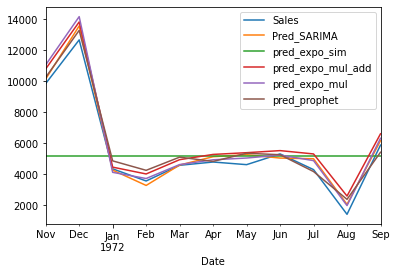

In [ ]:
test_data[['Sales','Pred_SARIMA','pred_expo_sim','pred_expo_mul_add','pred_expo_mul','pred_prophet']].plot()

In [ ]:
all_data = df.Sales.values.astype('float')

In [ ]:
train_size = int(len(all_data)*0.95)
train_data = all_data[:train_size]
test_data = all_data[train_size:]
len(train_data),len(test_data)

(99, 6)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn

In [ ]:
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data.reshape(-1,1))
print (train_data_normalized[:5])
print (train_data_normalized[-5:])

[[0.10062384]
 [0.08903832]
 [0.09576278]
 [0.09300818]
 [0.11123714]]
[[0.67066353]
 [0.89905209]
 [0.22482379]
 [0.161306  ]
 [0.24337681]]


In [ ]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [ ]:
train_window = 12
def create_inout_sequences(data,tw):
    d = []
    for i in range(len(data)-tw):
        temp_input = data[i:i+tw]
        temp_label = data[i+tw:i+tw+1]
        d.append([temp_input,temp_label])
    return d

train_inout_sequences = create_inout_sequences(train_data_normalized,train_window)

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [ ]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 200

for i in range(epochs):
    for seq, labels in train_inout_sequences:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.00185666
epoch:  26 loss: 0.00051707
epoch:  51 loss: 0.00034132
epoch:  76 loss: 0.00143793
epoch: 101 loss: 0.00046870
epoch: 126 loss: 0.00041253
epoch: 151 loss: 0.00103866
epoch: 176 loss: 0.00000579
epoch: 199 loss: 0.0000200008


In [ ]:
fut_pred = 6

test_inputs = train_data_normalized[-train_window:].tolist()

model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [ ]:
y_predicted = test_inputs[-fut_pred:]
y_predicted = scaler.inverse_transform(np.array(y_predicted).reshape(-1,1))
y_predicted

array([[4002.00189689],
       [3676.13124895],
       [3536.63588291],
       [2748.4377545 ],
       [ 435.2879366 ],
       [4196.69702764]])

In [ ]:
test_data

array([4788., 4618., 5312., 4298., 1413., 5877.])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(test_data,y_predicted)

0.107485115756916